## Homework #4. dataset collection
#### Author: `Anton Marynych`
#### Total time spent on h/w (in minutes): `180`

In [2]:
import pandas as pd


In [3]:
DIALOGS_MERGED_DATA_PATH = "../data/merged_data/dialogs_data_all.csv"
DIALOGS_META_MERGED_DATA_PATH = "../data/merged_data/dialogs_users_all.csv"

In [4]:
df = pd.read_csv(DIALOGS_MERGED_DATA_PATH)
df_meta = pd.read_csv(DIALOGS_META_MERGED_DATA_PATH)

## Task 2.1
## Messages data analysis

In [5]:
df.head(5)

,id,date,from_id,to_id,fwd_from,message,type,duration,dialog_id
0,555.0,2022-10-18 14:50:02+00:00,NaN,PeerChannel(channel_id=1688195526),NaN,⚡Аниме-сериал (Человек-бензопила) на обложке н...,photo,NaN,-1001688195526
1,554.0,2022-10-17 12:03:28+00:00,NaN,PeerChannel(channel_id=1688195526),NaN,NaN,text,NaN,-1001688195526
2,553.0,2022-10-02 17:31:54+00:00,NaN,PeerChannel(channel_id=1688195526),NaN,NaN,photo,NaN,-1001688195526
3,552.0,2022-10-02 17:31:54+00:00,NaN,PeerChannel(channel_id=1688195526),NaN,NaN,photo,NaN,-1001688195526
4,551.0,2022-10-02 17:31:54+00:00,NaN,PeerChannel(channel_id=1688195526),NaN,NaN,photo,NaN,-1001688195526


In [6]:
df.shape

(1624313, 9)

In [7]:
min(df["date"]),max(df["date"])

('2016-05-15 13:32:00+00:00', '2022-10-31 20:56:31+00:00')

In [8]:
df.groupby(["type"])["type"].count()

type
photo       146393
sticker      36986
text       1412434
video        21324
voice         7176
Name: type, dtype: int64

In [9]:
df.groupby(["type"])["duration"].sum()

type
photo            0.0
sticker          0.0
text             0.0
video      1411476.0
voice       175881.0
Name: duration, dtype: float64

## Tasks to do:

1. Define your telegram ID (https://www.alphr.com/telegram-find-user-id/).

In [10]:
id = "381081723"


2. Check on examples that the data you downloaded reflects your telegram messages. Make screenshots (insert your screenshots in this notebook) of 3 different messages in TG and related rows in your dataset here.

In [11]:
df.tail()


,id,date,from_id,to_id,fwd_from,message,type,duration,dialog_id
1624308,129364.0,2021-11-10 15:29:20+00:00,PeerUser(user_id=381081723),1053373318,NaN,"Добре, дякую)",text,NaN,1053373318
1624309,129363.0,2021-11-10 15:22:17+00:00,NaN,381081723,NaN,"Доброго дня, Антоне! \nПотрібні акуратні запис...",text,NaN,1053373318
1624310,129362.0,2021-11-10 15:05:43+00:00,PeerUser(user_id=381081723),1053373318,NaN,"Вибачте що турбую, в мене дуже не акуратно зап...",text,NaN,1053373318
1624311,129361.0,2021-11-10 15:03:54+00:00,PeerUser(user_id=381081723),1053373318,"MessageFwdHeader(date=datetime.datetime(2021, ...","Шановні студенти, доброго дня! Ви можете надси...",text,NaN,1053373318
1624312,118972.0,2021-10-06 12:31:48+00:00,PeerUser(user_id=381081723),1053373318,NaN,NaN,text,NaN,1053373318


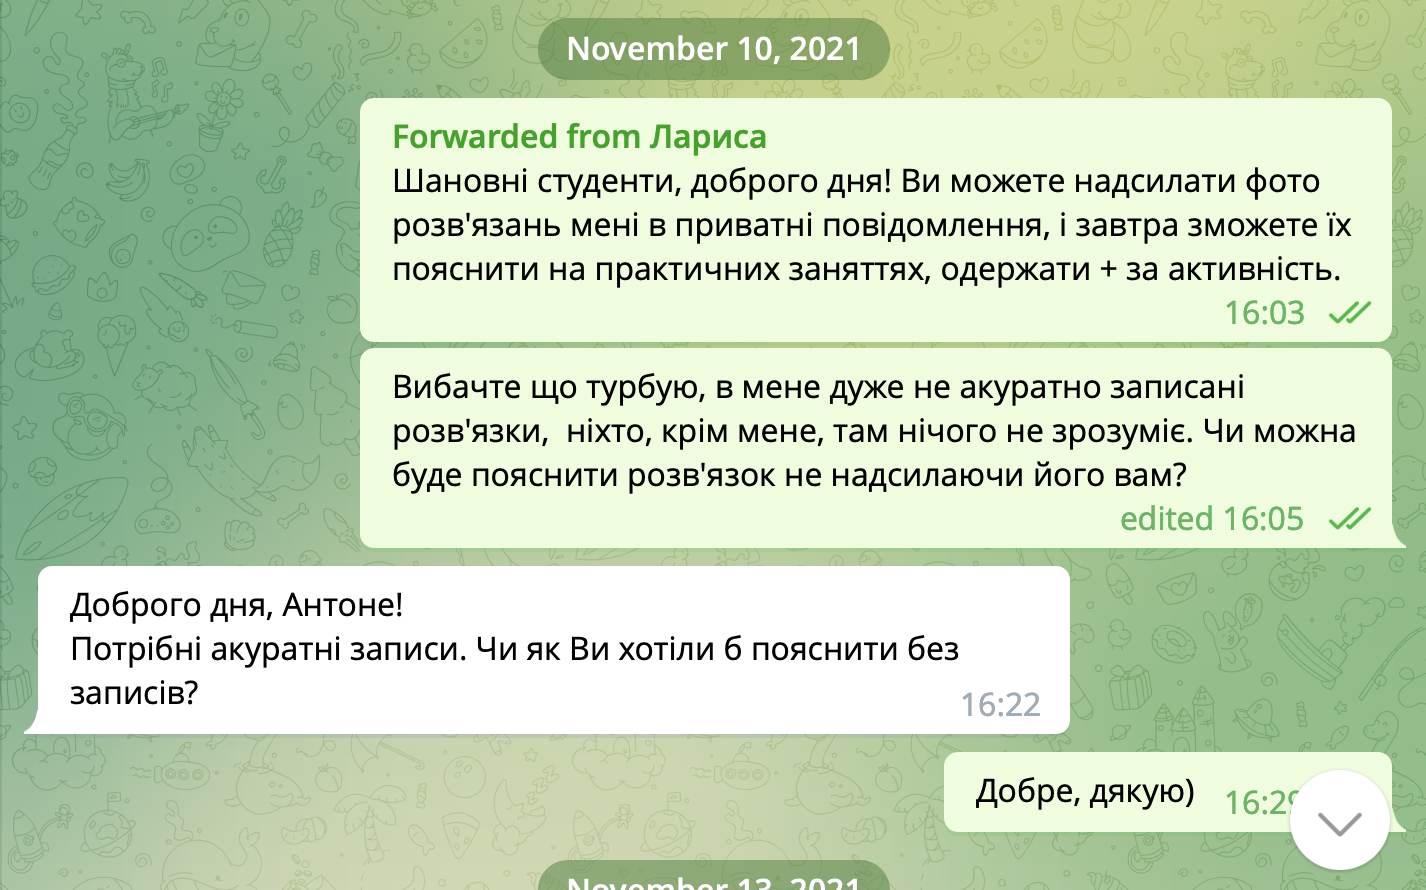

3. Find the longest audio message you've ever sent; what's its duration? Make its screenshot (insert your screenshots in this notebook).

In [12]:
df1 = df.copy()
df1 = df1.loc[df1["type"] == "voice"]
df1 = df1.loc[df1["from_id"] == "PeerUser(user_id=381081723)"]
df1 = df1.sort_values(by=['duration'], ascending= False)
print('The longest voice message duration is ', max(df1['duration']), ' seconds')


The longest voice message duration is  489.0  seconds


4. Calculate numbers of send and received(s&r) messages.

In [13]:
df2 = df.copy()

df3 = df2.copy()
df2 = df2.loc[df2["from_id"] == "PeerUser(user_id=381081723)"]
df3 = df3.loc[df3["to_id"] == "381081723"]
print(df.shape[0], " quantity of messages in total")
print(df2.shape[0], "  quantity of messages that I sent")
print(df3.shape[0], "  quantity of messages that were sent to me")
print (df2.shape[0] + df3.shape[0], "  quantity of s&r messages")

1624313  quantity of messages in total
118719   quantity of messages that I sent
102664   quantity of messages that were sent to me
221383   quantity of s&r messages


5. Draw number of send and received(s&r) messages per day (x-axis - is date(from min(date) till max(date)), y-axis number of messages). There should be two lines: blue for received red for send.

            date  amount
1146  2018-03-23       1
1126  2018-04-04       1
921   2018-04-28      36
1124  2018-06-10       1
1012  2018-10-13      19


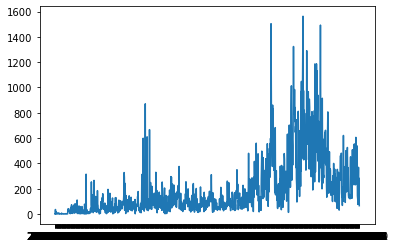

In [14]:
import matplotlib.pyplot as plt
def cutter(s):
    return s[:10]
df10 = pd.concat([df2, df3], axis=0)
df10['date'] = df10['date'].apply(cutter)
df11 = df10['date'].value_counts().rename_axis('date').reset_index(name='amount')
df11.astype({'date': 'datetime64[ns]'})
df11 = df11.sort_values(by=['date'])

print(df11.head())
plt.plot(df11['date'], df11['amount'] )

6. Draw a few diagrams to show distributions between post types in the time, a diagram showing the total amount of messages of each type.

         amount
type           
text     202577
photo     12452
voice      2622
sticker    2505
video      1227


([<matplotlib.patches.Wedge at 0x7fa7ef7c2760>,
 [Text(-1.0610607238541456, 0.29008643590164046, 'text'),
  Text(1.0306291534022995, -0.3844522703239758, 'photo'),
  Text(1.0887521111021983, -0.15690392146312582, 'voice'),
  Text(1.0972773969040073, -0.07734542160700707, 'sticker'),
  Text(1.099833253051581, -0.019152427573998817, 'video')],
 [Text(-0.5787603948295339, 0.15822896503725842, '92%'),
  Text(0.5621613564012543, -0.20970123835853224, '6%'),
  Text(0.5938647878739263, -0.08558395716170498, '1%'),
  Text(0.5985149437658221, -0.042188411785640215, '1%'),
  Text(0.5999090471190441, -0.010446778676726626, '1%')])

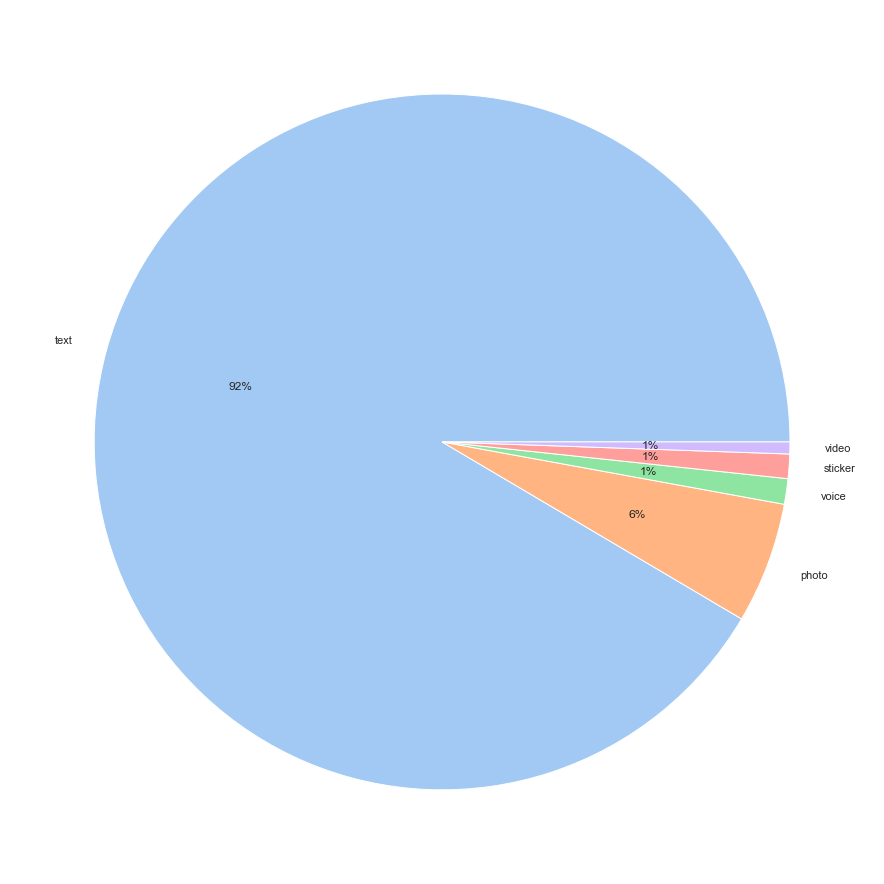

In [27]:
import seaborn as sns
def set_index(df, column):
    madelist = df.set_index(column)
    print(madelist)
    return madelist

df12 = df10['type'].value_counts().rename_axis('type').reset_index(name='amount')
df13 = set_index(df12, 'type')
df13.head()
# df13.plot.pie(y='amount', figsize=(25, 25), startangle=90)

colors = sns.color_palette('pastel')[0:5]
sns.set(rc={'figure.figsize':(20,16)})
#create pie chart
plt.pie(data=df12, x=df12['amount'],labels = df12['type'], colors = colors, autopct='%.0f%%')

In [ ]:
def cutter(s):
    return s[:10]

print('text messages graph')
df_all = pd.concat([df2, df3], axis=0)
df_text = df_all.loc[df_all['type'] == 'text']
df_text['date'] = df_text['date'].apply(cutter)

df_text_counter = df_text['date'].value_counts().rename_axis('date').reset_index(name='amount')
df_text_counter.astype({'date': 'datetime64[ns]'})
df_text_counter = df_text_counter.sort_values(by=['date'])

plt.plot(df_text_counter['date'], df_text_counter['amount'] )

In [ ]:
def cutter(s):
    return s[:10]

print('video messages graph')
df_all = pd.concat([df2, df3], axis=0)
df_video = df_all.loc[df_all['type'] == 'video']
df_video['date'] = df_video['date'].apply(cutter)

df_video_counter = df_video['date'].value_counts().rename_axis('date').reset_index(name='amount')
df_video_counter.astype({'date': 'datetime64[ns]'})
df_video_counter = df_video_counter.sort_values(by=['date'])

plt.plot(df_video_counter['date'], df_video_counter['amount'] )

In [ ]:
def cutter(s):
    return s[:10]

print('voice messages graph')
df_all = pd.concat([df2, df3], axis=0)
df_voice = df_all.loc[df_all['type'] == 'voice']
df_voice['date'] = df_voice['date'].apply(cutter)

df_voice_counter = df_voice['date'].value_counts().rename_axis('date').reset_index(name='amount')
df_voice_counter.astype({'date': 'datetime64[ns]'})
df_voice_counter = df_voice_counter.sort_values(by=['date'])

plt.plot(df_voice_counter['date'], df_voice_counter['amount'] )

7. Calculate top-10 people to whom you wrote the biggest amount of messages (name, amount of messages).

In [ ]:
def name_changer(id):
    names = df_meta[['users']]
    normal_names = names.loc[names['users'].str.contains(id)]
    if normal_names.empty:
        return "user_without_telegram_tag"
    normal_names=normal_names.reset_index(drop=True)
    list = normal_names['users'][0].split(',')
    return list[1][16:-1]
df4 = df2['to_id'].value_counts().rename_axis('id').reset_index(name='Amount')
df4 = df4.loc[~df4['id'].str.contains("C")]

df4['id'].astype(str)
df4['id'] = df4['id'].apply(name_changer)
df4 = df4.reset_index(drop=True)
df4.head(10)


#### 8. Calculate top-10 people who wrote the biggest amount of messages to you (name, amount of messages).

In [ ]:
def name_changer1(id):
    names = df_meta
    names['dialog_id'].astype(str)
    normal_names = names.loc[names['dialog_id'] == id]
    if normal_names.empty:
        return "user_without_telegram_tag"
  
    normal_names=normal_names.reset_index(drop=True)
    list = normal_names['users'][0].split(',')
    if 'bot' in list[3] or 'Bot' in list[3]:
        return 'bot'
      
    
    return list[1][16:-1]

df5 = df3['dialog_id'].value_counts().rename_axis('dialog').reset_index(name='Amount')


df5['dialog'].astype(str)
print(df5.head(10))
df5['dialog'] = df5['dialog'].apply(name_changer1)
df5 = df5.loc[df5['dialog'] != 'bot']
df5 = df5.reset_index(drop=True)
df5.head(10)

## Task 2.2
## Dialogs data analysis

In [ ]:
df_meta.shape

In [ ]:
df_meta.head(10)

In [ ]:
df_meta.groupby(["type"])["type"].count()

## Tasks to do:

1. Find our TG group. Print its id and list of participants.

2. Draw distribution of group sizes.

In [ ]:
df_meta1= df_meta.loc[df_meta['type'] == 'Group']
df_meta2 = df_meta1['name'].value_counts().rename_axis('name').reset_index(name='amount')
# plt.pie(df_meta2["amount"], labels = df_meta2["name"], radius=10)
plt.plot(df_meta2.index, df_meta2['amount'] )

3. Calculate top-10 the biggest groups/channels.

In [ ]:
print("Top 10 groups/channels by size")
df_meta2.head(10)





4. Calculate the number of distinct user names you are connected to through any type of dialogue.

In [ ]:
df_meta2 = df_meta['users'].value_counts().rename_axis('user').reset_index(name='amount')
print('Number of users that I am connected to is ', df_meta2.shape[0]-1)# -1 because I don't count


